In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tables
import h5py
from scipy.spatial.distance import pdist, squareform

/home/orv/gentoo/usr/lib64/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [18]:
def findfile(Energy, radius):
    filename = '../coeff/old/' + Energy + '/file_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    mean = np.array(h.root.mean)[:]
    expect = np.array(h.root.expect)[:]
    h.close()
    h1 = h5py.File(filename,'r')
    rate = np.array(h1['rate'])
    h1.close()
    return coeff, mean, expect, rate

no such file -0.65
no such file -0.64
no such file +0.64
no such file +0.65


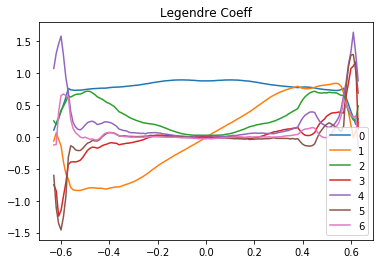

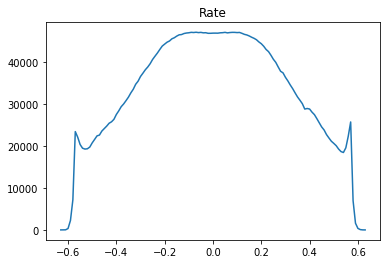

In [19]:
Energy = ['0.8MeV','1MeV','1.2MeV','1.5MeV','1.8MeV','2MeV']
coeff_total = np.zeros((0,7))
mean_total = np.zeros((0,30))
expect_total = np.zeros((0,30))
rate_total = []
x_total = np.zeros((0,1))
for radius in np.arange(-0.65,0.66,0.01):
    str_r = '%+.2f' % radius
    try:
        coeff, mean, expect, rate = findfile('1MeV',str_r)
        coeff_total = np.vstack((coeff_total, coeff))
        mean_total = np.vstack((mean_total, mean))
        expect_total = np.vstack((expect_total, expect))
        rate_total = np.hstack((rate_total, rate))
        x_total = np.vstack((x_total, radius))
    except:
        print('no such file',str_r)
plt.figure(num = 1)
plt.plot(x_total, coeff_total)
plt.legend(range(np.size(coeff_total[0,:])))
plt.title('Legendre Coeff')
plt.figure(num = 2)
plt.plot(x_total, rate_total)
plt.title('Rate')
plt.show()

In [17]:
coeff_total[:,0]

array([0.59271679, 0.6800992 , 0.6800992 , 0.6800992 , 0.6800992 ,
       0.6800992 , 0.6800992 , 0.6800992 , 0.6800992 , 0.6800992 ,
       0.6800992 , 0.6800992 , 0.6800992 , 0.6800992 , 0.6800992 ,
       0.6800992 , 0.6800992 , 0.6800992 , 0.6800992 , 0.6800992 ,
       0.6800992 , 0.6800992 , 0.6800992 , 0.6800992 , 0.6800992 ,
       0.6800992 , 0.6800992 , 0.6800992 , 0.6800992 , 0.6800992 ,
       0.6800992 , 0.6800992 , 0.6800992 , 0.6800992 , 0.6800992 ,
       0.6800992 , 0.6800992 , 0.6800992 , 0.6800992 , 0.6800992 ,
       0.6800992 , 0.6800992 , 0.6800992 , 0.6800992 , 0.6800992 ,
       0.68124651, 0.68124651, 0.68124651, 0.69157232, 0.69157232,
       0.69157232, 0.69157232, 0.69157232, 0.69157232, 0.68124651,
       0.68124651, 0.68124651, 0.68124651, 0.68021393, 0.68124651,
       0.68124651, 0.68124651, 0.69157232, 0.69157232, 0.69157232,
       0.69157232, 0.69157232, 0.69157232, 0.69157232, 0.69157232,
       0.69157232, 0.69157232, 0.69157232, 0.69157232, 0.69157